In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, jaccard_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('../two_hand_dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.416884,0.398198,9.231105e-08,0.440355,0.418981,0.000851,0.462308,0.409297,0.002154,0.476492,...,0.494878,0.340499,-0.012642,0.483368,0.327534,-0.013849,0.473130,0.313184,-0.014489,W - w
1,0.367563,0.391067,1.931785e-07,0.392339,0.411383,-0.010059,0.418045,0.395297,-0.012789,0.437574,...,0.443368,0.335902,-0.016060,0.428517,0.333011,-0.016123,0.415861,0.330724,-0.016053,W - w
2,0.513852,0.629512,1.237706e-07,0.527622,0.594395,0.012128,0.546886,0.574932,0.012896,0.563336,...,0.584597,0.597702,-0.020761,0.580340,0.594942,-0.022171,0.579238,0.591127,-0.023237,W - w
3,0.612112,0.419646,1.031378e-07,0.588227,0.426500,0.000959,0.569878,0.407705,0.001824,0.558725,...,0.543871,0.348149,-0.018733,0.560483,0.338938,-0.022277,0.574302,0.331814,-0.024076,W - w
4,0.661499,0.411782,1.173787e-07,0.635604,0.417834,0.002910,0.617584,0.398923,0.003796,0.606534,...,0.600330,0.344789,-0.024343,0.617790,0.335505,-0.027912,0.632199,0.327563,-0.029975,W - w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19707,0.266936,0.765332,3.186107e-08,0.283168,0.741557,0.003694,0.306626,0.726681,0.000221,0.324460,...,0.385244,0.794343,-0.038108,0.393905,0.796690,-0.034266,0.402803,0.787262,-0.029931,X - x
19708,0.464405,0.726086,5.008116e-08,0.479760,0.699245,0.007280,0.503350,0.686881,0.004551,0.522565,...,0.587828,0.755971,-0.043094,0.594705,0.757439,-0.038388,0.604890,0.746693,-0.033928,X - x
19709,0.823775,0.457433,-7.920000e-08,0.794429,0.462594,-0.002565,0.770854,0.449639,-0.008433,0.755111,...,0.695945,0.426788,-0.021883,0.688015,0.445829,-0.016713,0.678770,0.449493,-0.011256,X - x
19710,0.382227,0.774987,1.175287e-07,0.410367,0.727214,0.002885,0.454583,0.711765,-0.007009,0.489562,...,0.615526,0.845971,-0.076869,0.626596,0.854500,-0.069940,0.642314,0.831486,-0.062143,X - x


In [3]:
df = df.rename(columns={126: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,Output
0,0.416884,0.398198,9.231105e-08,0.440355,0.418981,0.000851,0.462308,0.409297,0.002154,0.476492,...,0.494878,0.340499,-0.012642,0.483368,0.327534,-0.013849,0.473130,0.313184,-0.014489,W - w
1,0.367563,0.391067,1.931785e-07,0.392339,0.411383,-0.010059,0.418045,0.395297,-0.012789,0.437574,...,0.443368,0.335902,-0.016060,0.428517,0.333011,-0.016123,0.415861,0.330724,-0.016053,W - w
2,0.513852,0.629512,1.237706e-07,0.527622,0.594395,0.012128,0.546886,0.574932,0.012896,0.563336,...,0.584597,0.597702,-0.020761,0.580340,0.594942,-0.022171,0.579238,0.591127,-0.023237,W - w
3,0.612112,0.419646,1.031378e-07,0.588227,0.426500,0.000959,0.569878,0.407705,0.001824,0.558725,...,0.543871,0.348149,-0.018733,0.560483,0.338938,-0.022277,0.574302,0.331814,-0.024076,W - w
4,0.661499,0.411782,1.173787e-07,0.635604,0.417834,0.002910,0.617584,0.398923,0.003796,0.606534,...,0.600330,0.344789,-0.024343,0.617790,0.335505,-0.027912,0.632199,0.327563,-0.029975,W - w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19707,0.266936,0.765332,3.186107e-08,0.283168,0.741557,0.003694,0.306626,0.726681,0.000221,0.324460,...,0.385244,0.794343,-0.038108,0.393905,0.796690,-0.034266,0.402803,0.787262,-0.029931,X - x
19708,0.464405,0.726086,5.008116e-08,0.479760,0.699245,0.007280,0.503350,0.686881,0.004551,0.522565,...,0.587828,0.755971,-0.043094,0.594705,0.757439,-0.038388,0.604890,0.746693,-0.033928,X - x
19709,0.823775,0.457433,-7.920000e-08,0.794429,0.462594,-0.002565,0.770854,0.449639,-0.008433,0.755111,...,0.695945,0.426788,-0.021883,0.688015,0.445829,-0.016713,0.678770,0.449493,-0.011256,X - x
19710,0.382227,0.774987,1.175287e-07,0.410367,0.727214,0.002885,0.454583,0.711765,-0.007009,0.489562,...,0.615526,0.845971,-0.076869,0.626596,0.854500,-0.069940,0.642314,0.831486,-0.062143,X - x


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (19712, 126)
Labels shape = (19712,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
# }

# grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)  

# print("Performing grid search...")
# grid_search.fit(x_train, y_train)
# print("Grid search complete.")

# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# best_svm_model = grid_search.best_estimator_

Performing grid search...
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=  32.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.658 total time=  29.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.647 total time=  29.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.657 total time=  29.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.634 total time=  29.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.667 total time=  58.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.667 total time=  23.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.658 total time=  23.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.659 total time=  23.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.641 total time=  22.9s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.995 total time=   3.8s
[CV 2/5] END .......C

In [6]:
svm = SVC(C=100, gamma=1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=100, gamma=1)

In [7]:
y_pred = svm.predict(x_test)
y_pred

array(['W - w', 'N - n', 'X - x', ..., 'Z - z', 'Q - q', 'E - e'],
      dtype=object)

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
iou = jaccard_score(y_test, y_pred, average='micro')

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("IoU:", iou)

F1 Score: 0.9989855440020289
Recall: 0.9989855440020289
Precision: 0.9989855440020289
Accuracy: 0.9989855440020289
IoU: 0.9979731441601216


<Axes: title={'center': 'Confusion Matrix for Two Hand Dataset'}>

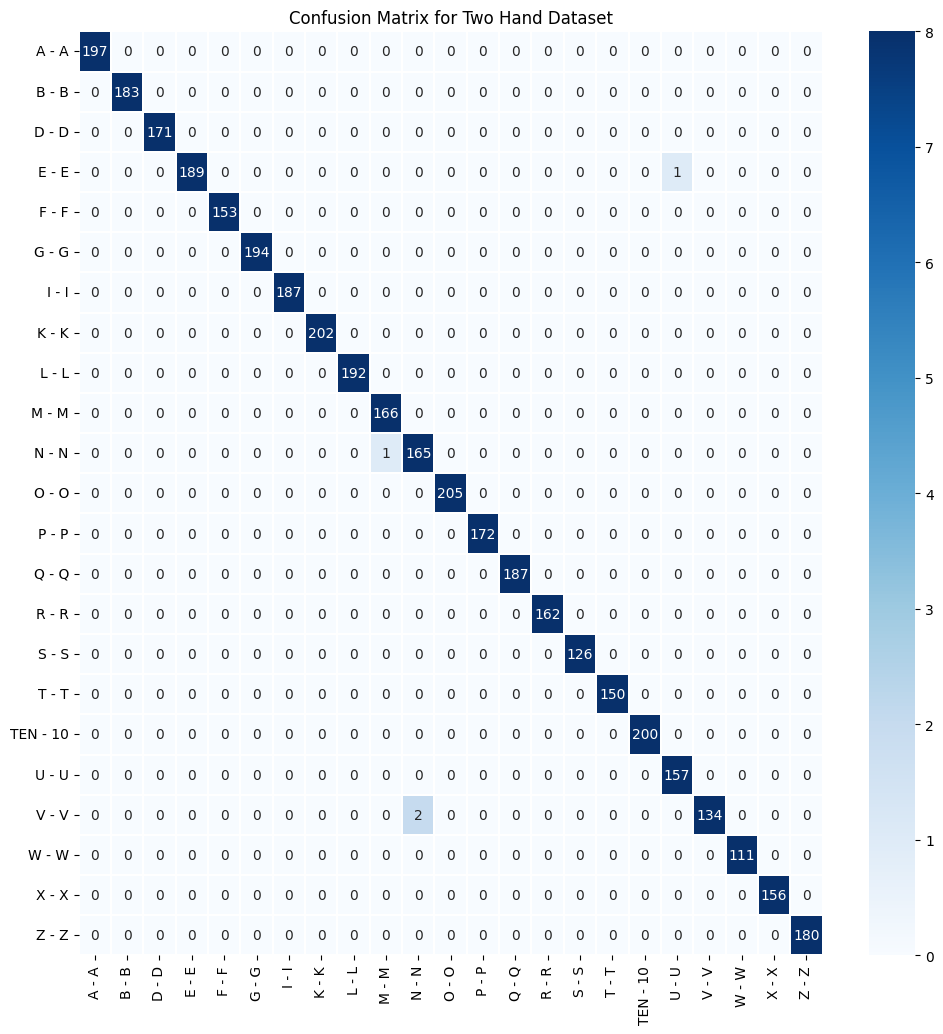

In [ ]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix for Two Hand Dataset")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [16]:
save_path = '../two_hand_model.pkl'

with open(save_path, 'wb') as f:
    pickle.dump(svm, f)
